In [ ]:
Goals: Have three goals for this assignment:
        
1. To accomplish the tasks given in the assignment on top of predicting
2. To drive home some of the best practices in model building


In [ ]:
The best practices that are demonstrated in this assignment are as follows:
    
1. Missing Value Imputation: using a simple technique
2. Cross Validation: how is this useful?
3. Model Performance: Why should you be skeptical when your model outperforms on validation set?
4. Confusion matix: how to interpret a classifier outcome
5. Reusable code: whenever possible

    

In [ ]:
Task: The primary task is to predict whether a burrito is "great" or not.
 
Also this assignment has incorporated other tasks mentioned in the question like:

Exploratory data analysis (EDA) 
Scikit-learn pipeline
Splitting into validation and test
Validation accuracy
Model test accuracy

    

In [ ]:
Overview:

Would like to give an overview before diving deep into model building. 

    
Input: Have chosen specific set of features and have provided my reasoning for the same.
    
Output: Have converted the target column: "Great" with boolean values into numeric, i.e., 1 means 'great' and 0 means 
'not great'.

Model: I am building a classification model using Logistic Regression algorithm. It is a binary classification model and 
therefore the outcome will be in the format of 1s ('great') and 0s ('not great').

Two parts: 
Part I: The classifier with chosen features but do not involve scaling the features
    
Part II: The classifier with chosen features and that involves scaling procedure 

(Part II is developed to demonstrate the point 3 under best practices: 
 Model Performance: Why should you be skeptical when your model outperforms on validation set?)


In [ ]:
Let us dive deeper

In [ ]:
First: Feature Engineering

In [64]:
#Let's import all the necessary packages/libraries/models

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
The dataset was split into train, validation, and test according to the following:

Train set with records from 2016 & earlier
Validation set with records in the year 2017
Test set with records in the year 2018 & later

Suggestion: Especially when you are planning to replace the missing values in a column using the mean of the column, it
is a good practice to implement the imputation technique separately in the train and validation sets. 

In [2]:
#Reading in the train set
train=pd.read_csv("/Users/chidam/Desktop/burritos_train_set.csv")

In [3]:
#Let's check the first few records:

train.head()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,Donato's taco shop,California,1/18/16,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Oscar's Mexican food,California,1/24/16,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Oscar's Mexican food,Carnitas,1/24/16,NaN,NaN,NaN,NaN,NaN,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Oscar's Mexican food,Carne asada,1/24/16,NaN,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,Pollos Maria,California,1/27/16,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [4]:
#Total number of features
len(train.columns)

65

In [5]:
#Let's find out whether any values missing in the train set. If yes, then let's get the percent of missing values in each
#column

percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Location,Location,0.000000
Burrito,Burrito,0.000000
Date,Date,0.000000
Neighborhood,Neighborhood,74.581940
Address,Address,75.919732
...,...,...
Sushi,Sushi,99.331104
Avocado,Avocado,95.652174
Corn,Corn,99.331104
Zucchini,Zucchini,99.665552


In [6]:
#Let's check the columns with fewer than 10% of missing values

missing_value_df.loc[missing_value_df["percent_missing"]<10]

,column_name,percent_missing
Location,Location,0.000000
Burrito,Burrito,0.000000
Date,Date,0.000000
Cost,Cost,2.006689
Hunger,Hunger,0.334448
Tortilla,Tortilla,0.000000
Temp,Temp,5.016722
Meat,Meat,3.344482
Fillings,Fillings,0.334448
Meat:filling,Meat:filling,2.006689


In [ ]:

Because there are many columns with significant number of values missing, lets just focus on columns with only a fewer 
missing values. It is a good starting point and can always try adding more features as we go along.

For this assignment, I have chosen only above features (plus the target column) and have provided my reasoning in the 
visualization section below.


In [7]:
#Let's convert the boolean values in the target column into numerical values

train["Great"] = train["Great"].astype(int)


In [8]:
#Let's check the distribution of 1s and 0s in the target column

train["Great"].value_counts()



0    176
1    123
Name: Great, dtype: int64

In [ ]:
Observation: Imbalanced dataset?

The classes are not balanced, but they are not awfully imbalanced either. The spread is moderate and therefore do not 
have to worry about balancing the classes in the context.


In [10]:
#Let's save the chosen columns in a variable selected and will be using it for the rest of the process

selected=["Cost", "Hunger", "Tortilla", "Temp", "Meat", "Fillings", "Meat:filling", "Uniformity", "Salsa", "Synergy", "Wrap"]




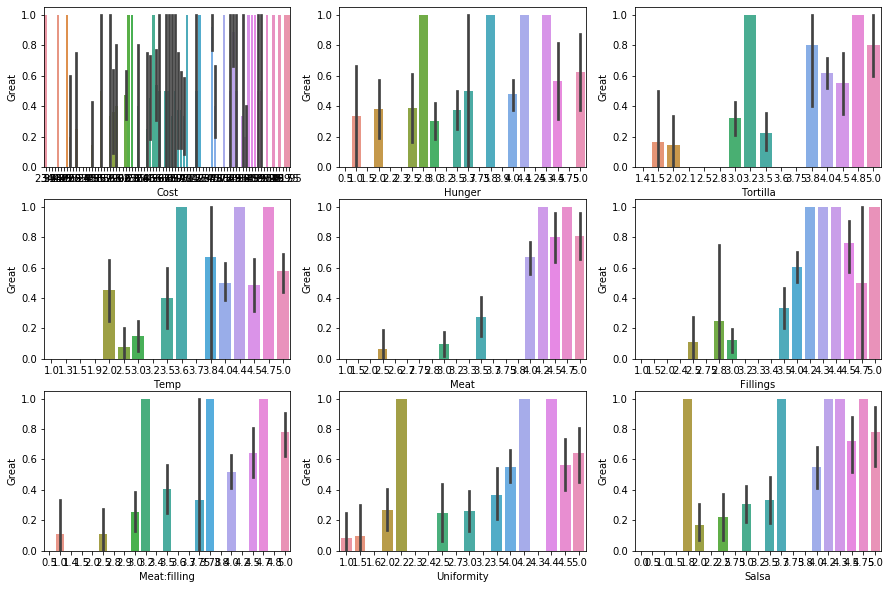

In [11]:
# Deciding on visualization!

How can you decide on which visualization to go far? Well, it is good to start with a goal. My goal: is to check how 
the features behave with re to target column. So I decided to plot the features Vs. target. Although the bar plot 
shows confidence interval and some grouping after a range for some features, it is clearly confusing. That directs me 
to plotting the much clearer line plot below.



fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(selected, ax.flatten()):
    sns.barplot(x=var, y='Great', data=train, ax=subplot)

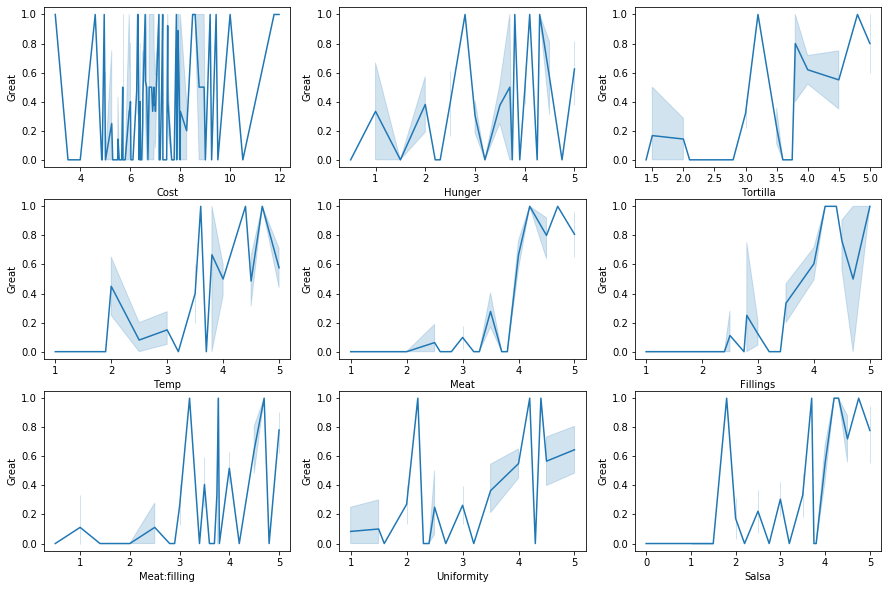

In [12]:
#Let's see what the realtionship looks like between the features and our target variable, "Great"
#This solves my purpose

fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(selected, ax.flatten()):
    sns.lineplot(x=var, y='Great', data=train, ax=subplot)

In [ ]:
Observation:
Clear pattern exists amongst following features Vs. target column: 
    
Hunger: Customers with hunger level at 3 and above have seemed to have rated the burriot great.
Tortilla: The quality of tortilla played a significant role in rating a burrito great or not.
Temp: No one would like a cold burrito :) temperature mattered.
Meat: Meat quality was a significant indicator too.    
Fillings: The quality of a balanced filling mattered.
Meat:filling: The ratio between meat and non-meat turns out to be a significant indicator too.

------------------------------------------------------------------------------------------------------------------------------       

No clear pattern: What about other features?
    
Cost Vs. Great: Although the data points for cost are heavily clustered between 5 and 8, a clear pattern does not exist to 
declare a win between low and high cost.
    
Customers that do not like a variety in salsa (salsa ratings less than 3) rated burritos great and so did the customers 
that like a variety in salsa (salsa ratings greater than 3). So customers preferences seemed to have affected the 
salsa ratings.

The similar explanation goes true for uniformity (bites full of sour cream and cheese with meat).



In [ ]:
What about the categorical features we have?

Ought to list a few of them.

Location:
There are many categorical features, but I found 'Location' could make sense in the context as there are multiple records 
for many restaurants/shops/food trucks.

How?
Burrito from the same restaurant could have been rated 'Not Great' and vice versa. It would make sense to the quality of 
burrito and therefore to the context of the rating that we are trying to predict.

------------------------------------------------------------------------------------------------------------------------------    
Burrito:
At the same time, the feature 'Burrito' could be confusing as there are burritos titled 'California' available in many 
restaurants. A 'California' burrito from shop:X is not the same from shop:Y.
        
        


In [ ]:
I have not used any categorical features in the solutions. But would like to demonstrate encoding techniques in case 
of using categorical column. For the purpose of demonstration, I am using the feature: 'Location'
    

In [14]:
#Let's look at the values in the column

train["Location"].values.tolist()[:25]

["Donato's taco shop",
 "Oscar's Mexican food",
 "Oscar's Mexican food",
 "Oscar's Mexican food",
 'Pollos Maria',
 'Pollos Maria',
 "Nico's Taco Shop",
 "Nico's Taco Shop",
 'Los Primos Mexican Food',
 "JV's Mexican Food",
 "JV's Mexican Food",
 "Tony's Fresh Mexican Food",
 "Tony's Fresh Mexican Food",
 "Tony's Fresh Mexican Food",
 "Tony's Fresh Mexican Food",
 'Taco Stand',
 'Taco Stand',
 "Graciela's Taco Shop",
 "Graciela's Taco Shop",
 "Rigoberto's Taco Shop La Jolla",
 "Rigoberto's Taco Shop La Jolla",
 "Lolita's taco shop",
 "Lolita's taco shop",
 'Taco Stand',
 'Taco Stand']

In [ ]:

A good way to represent such a feature is to ensure the name of restaurant is represented the same everywhere in the column,
i.e., have to make sure to remove extra spaces, spell, and punctuation errors. Thus can maintain the sparsity of the 
dataset from spinning out of control.

Can make sure of that there are no duplicates by using Label Encoding first followed by One Hot Encoding technique as in the
steps in the cell below:


FYI: have used pd.get_dummies (from pandas) to implement One Hot Encoding. 




In [17]:
label_encoder = preprocessing.LabelEncoder()


In [18]:
label_encoder.fit(train["Location"].tolist())

LabelEncoder()

In [20]:
transformed=label_encoder.transform(train["Location"].tolist())

In [21]:
encoded = pd.get_dummies(transformed)
encoded

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

Observation:
After conversion the column gets transformed and have to be added to with the rest of the chosen features.
Obviously the dataset becomes sparse. Caution must be used as not every algorithm does good with sparse data, 
for example: Logistic Regression.
    

    



In [ ]:

Logistic Regression Model does not accept input with missing values in them. Lets just replace the missing values in 
every column using a simple technique of using mean of the column 

(FYI: we call this technique of replacing missing values as imputation technique)




In [22]:
#Let's select the chosen columns

selected_df=train[["Cost", "Hunger", "Tortilla", "Temp", "Meat", "Fillings", "Meat:filling", "Uniformity", "Salsa", "Synergy", "Wrap"]]



In [25]:
#Let's check for the missing values in the train set
selected_df.isnull().sum() * 100 / len(selected_df)

Cost            2.006689
Hunger          0.334448
Tortilla        0.000000
Temp            5.016722
Meat            3.344482
Fillings        0.334448
Meat:filling    2.006689
Uniformity      0.668896
Salsa           6.688963
Synergy         0.668896
Wrap            0.668896
dtype: float64

In [26]:
#Imputing with mean value
selected_df=selected_df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [27]:
#Let's check whether the missing values are replaced after the above conversion
selected_df.isnull().sum() * 100 / len(selected_df)

Cost            0.0
Hunger          0.0
Tortilla        0.0
Temp            0.0
Meat            0.0
Fillings        0.0
Meat:filling    0.0
Uniformity      0.0
Salsa           0.0
Synergy         0.0
Wrap            0.0
dtype: float64

In [28]:
#Let's save the input values in X
X=selected_df.values

In [23]:
#Let's save the target column in y. When .values is used the column values get transformed into a numpy array and that 
#is the standard way of giving input to a model

y=train["Great"].values

In [ ]:
We are good to go with model building...

In [ ]:

------------------------------------------------------------------------------------------------------------------------------       


In [ ]:
Part I: The classifier with chosen features but do not involve scaling the features

In [ ]:
Lets create a reusable code to implement Cross-Validation in the cell below. We will be using this code repeatedly in
the process. But wait, why should we use Cross-Validation when we can use accuracy_score to check for the model performance?

It is possible to use accuracy_score (from skLearn) to check on the model performance and that is the metric we are using in the 
assignment. But that does not tell us whether our model is overfitting or underfitting the train and validaiton set. 
Cross-Validation is the industry gold standard, so lets use it. 



In [29]:

#Implementing a 5-fold Cross Validation 
# FYI: By default cross_val_score uses the scoring provided in the given estimator, which is usually the simplest 
# appropriate scoring method. For Logistic Regression it is accuracy and that is what we are after.

def cross_validation(model, X, y):
    n_folds = 5
    kf = KFold(n_folds, shuffle=True, random_state=42)
    accuracy_score=cross_val_score(model, X, y, cv = kf)
    return accuracy_score.mean()



In [40]:
#Before calling the above function we need a model. Let's load the Logistic Regression Model

model = LogisticRegression(random_state=0)#we can reuse this for validation and test

In [41]:
model_fitted=model.fit(X, y)#fitting X and y here

In [42]:
#Let's check the accuracy on the train set. Look great. Now what about validation set 
# (Point to remember: because we cannot test using test set, we use the validation set to check on the model's performance)
 
cross_validation(model_fitted, X, y)

0.8728813559322035

In [ ]:

Observation:
The accuracy on the train set is good at approx. 87%



In [35]:
#Let's check how the model does it on the validation set. Let's get the validation set 

validation_df=pd.read_csv("/Users/chidam/Desktop/burritos_validation_set.csv")

In [36]:
#Let's convert the target column in the validation set and store it in y_valid

validation_df["Great"] = validation_df["Great"].astype(int)
y_valid=validation_df["Great"].values

In [34]:
#Let's create a reusable code to impute the missing values. We can now use this on the validation and test set

def impute_missing_values(df):
    df=df.apply(lambda x: x.fillna(x.mean()),axis=0)
    return df
    
    
    



In [37]:
#Selecting the same chosen columns we used in the train set
selected_valid_df=impute_missing_values(validation_df[["Cost", "Hunger", "Tortilla", "Temp", "Meat", "Fillings", "Meat:filling", "Uniformity", "Salsa", "Synergy", "Wrap"]])


In [38]:
#Let's check whether there are any missing values in the validation set. Looks like there are not!
selected_valid_df.isnull().sum() * 100 / len(selected_valid_df)

Cost            0.0
Hunger          0.0
Tortilla        0.0
Temp            0.0
Meat            0.0
Fillings        0.0
Meat:filling    0.0
Uniformity      0.0
Salsa           0.0
Synergy         0.0
Wrap            0.0
dtype: float64

In [72]:
#Let's get our X_valid
X_valid=selected_valid_df.values

In [43]:
# Let's check the model's performance on the validation set
model_valid = model.fit(X_valid, y_valid)#using the model where we instantiated Logistic Regression

In [44]:
#Let's check the model's performance on the validation set

cross_validation(model_valid, X_valid, y_valid)

0.8470588235294118

In [ ]:
Observation:
The accuracy on the validation set is also good at approx. 85% It is only fair the score is less compared to that using the 
train set. Because the model never saw (i.e., trained using) the validation set. Skepticism is encouraged if the score 
is high!

What we know now:
1. The model is not underfitting the training data, because the model did not perform poorly on the training data. It 
performed well.

2. The model is not overfitting either as the model also has performed well on the validation data.



In [ ]:
The model has performed well on both the training and validation data sets. Now what?

Good accuracy does not give the entire picture. Confusion Matix comes in to save!

In [45]:
# Before using the confusion matrix, we need to predict. Let's predict the target column in the validation set and check
#how the model has performed using the confusion matrix

y_valid_pred=model_fitted.predict(X_valid)#have to use the model that we trained using the train set. could have 
#chosen a different name for model used for training

In [46]:
#As of now y_valid is our true target column as we are using the validation set to check the model's performance

CM_valid=confusion_matrix(y_valid, y_valid_pred)


In [47]:
#The true positive, false positive, true negative, and false negative from the confusion matrix as follows.

TN = CM_valid[0][0]
FN = CM_valid[1][0]
TP = CM_valid[1][1]
FP = CM_valid[0][1]

In [48]:
TN, FN, TP, FP

(45, 6, 32, 2)

In [49]:
#Let's see the number of positives and negatives in the validation set to make sense of the confusion matrix outcome

validation_df["Great"].value_counts()



0    47
1    38
Name: Great, dtype: int64

In [ ]:

Observation:
Now the confusion matrix gives us a better picture regarding how many the model has got right and wrong.

The model has got 45 out of the 47 negatives (0s) correct and 32 out of 38 positives (1s) correct. 
This is a decent outcome. Now the model is ready to be trained using both the train and validation sets and finally test it
on the test set.






In [50]:
#It's possible to combine both the train and validation sets using one line in pandas library like this:

X_combined = selected_df.append(selected_valid_df, ignore_index=True)



In [51]:
#Let's also combine the y values in both the train and validation sets

y_combined=train["Great"].append(validation_df["Great"], ignore_index=True)


In [52]:

#Let's just make sure that our combined X does not have any missing values
X_combined.isnull().sum() * 100 / len(X_combined)


Cost            0.0
Hunger          0.0
Tortilla        0.0
Temp            0.0
Meat            0.0
Fillings        0.0
Meat:filling    0.0
Uniformity      0.0
Salsa           0.0
Synergy         0.0
Wrap            0.0
dtype: float64

In [53]:
#Let's read the test set 
test=pd.read_csv("/Users/chidam/Desktop/burritos_test_set.csv")

In [56]:
#Let's check the number of classes in the test set

test["Great"].value_counts()

True     21
False    16
Name: Great, dtype: int64

In [54]:
#Selecting the same chosen columns we used in the train set
test_df=impute_missing_values(test[["Cost", "Hunger", "Tortilla", "Temp", "Meat", "Fillings", "Meat:filling", "Uniformity", "Salsa", "Synergy", "Wrap"]])


In [55]:
#Let's get the X from the test set
X_test=test_df.values

In [57]:
#As before let's convert and get the y from the test set
test["Great"] = test["Great"].astype(int)
y_test=test["Great"].values

In [58]:
#Let's fit the model on the entire training set including the validaiton set
clf=model.fit(X_combined.values, y_combined.values)


In [59]:
y_test_pred=clf.predict(X_test)

In [60]:
#No more Cross_Validation at this point. Let's check model's performance 
CM_test=confusion_matrix(y_test, y_test_pred)

In [61]:
TN_test= CM_test[0][0]
FN_test = CM_test[1][0]
TP_test = CM_test[1][1]
FP_test = CM_test[0][1]

In [62]:
TN_test, FN_test, TP_test, FP_test

(11, 4, 17, 5)

In [ ]:
Observation:

The model has got 11 out of the 16 negatives (0s) correct and 17 out of 21 positives (1s) correct. 
This is a good outcome, but before, say, deploying the model a few suggestions to improve the score further:
    
1. Can further add other features like ingredients and even transformed reviews to improve the score.
2. Grid Search for optimum parameters and customize the model.
3. Can also narrow down on significant features thereby avoiding highly correlated and redundant features. 


In [ ]:
------------------------------------------------------------------------------------------------------------------------------       


In [ ]:
Part II: The classifier with chosen features and that involves scaling procedure 

In [ ]:

Now you have a hang of the precedure and the various steps involved in the model building process. So we are not going to 
dive deeper in this section again. Lets cut to the chase! 

In [ ]:
Can use the Pipeline command of skLearn to combine scaling the data and fitting the model on it like as follows:

pipe = Pipeline([('scale', StandardScaler()), ('clf', LogisticRegression(random_state=0))]

In [ ]:

After imputing the data and scaling X_train it looks like as follows



In [70]:
Sacled X_train

X_scaled

array([[-3.43038668e-01, -5.27005189e-01, -5.96820381e-01, ...,
         7.23553702e-01,  4.94381628e-01,  3.56687841e-02],
       [-1.21202813e+00,  6.22914201e-02, -1.85129696e+00, ...,
         1.88794807e-01, -1.13587015e+00,  8.96939424e-01],
       [-1.71336821e+00, -2.29489502e+00, -5.96820381e-01, ...,
        -3.45964088e-01, -5.92452891e-01,  8.96939424e-01],
       ...,
       [ 7.09775492e-01,  6.51588029e-01,  3.04179104e-02, ...,
        -1.20157832e+00, -2.66402535e-01,  4.66304104e-01],
       [ 7.09775492e-01,  6.51588029e-01,  6.57656202e-01, ...,
        -1.41548188e+00, -1.67928741e+00,  3.56687841e-02],
       [ 7.47447292e-02,  2.98010064e-01,  1.55865569e-01, ...,
        -4.74961311e-16,  2.77014724e-01, -1.68687250e+00]])

In [71]:
The accuracy on the training set after scaling (goes down a little bit from approx 87% to 86.9%)

cross_validation(model, X_scaled, y)

0.8694915254237288

In [74]:
But the accuracy on the validation set after scaling jumps up from approx. 84% to 87% Now it might be very good preformance
but get skeptical!

cross_validation(model, X_valid_scaled, y_valid)

0.8705882352941178

In [ ]:
Just listing the outcome of the confusion matrix after testing using scaled data

TN, FN, TP, FP

(16, 21, 0, 0)

In [ ]:
Observation:

The model gets the negatives, i.e., 0s perfectly correct, but completely gets the 21 true positives wrong and 
labels them as negative.



In [ ]:
What have we learnt?
Although the model fitted and tested using the scaled data was not overfitting or underfitting, the model does not perform
well. In general, be cautious when your model does extremely well on the validation or evaluation data.

Suggestion:
    
Accuracy=TP+TN/(TP+TN+FP+FN)
where:
TP-> True Positives
TN-> True Negatives
FP-> False Positives
FN-> False Negatives
    
Accuracy is not a great metric for a classification task primarily because it considers how many values it got right 
in its numerator. It could have gotten either of the classes completely wrong but still might score high values. So 
maybe, depending on the context, picking an appropriate metric like 'log loss' or 'F1 score' might prove useful.



In [ ]:
Hope you enjoyed the journey of building a model through this assignment. And that you will keep building more starting 
with this!